In [1]:
import pandas
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

In [3]:
d = {'Discreetness': [28, 8, 8, 9, 10], 
    'Uniqueness': [19, 22, 15, 4, 3],
    'Physical Appearance': [2, 2, 8, 25, 26],
    'Fashionable': [8, 12, 14, 13, 16],
    'Familiarity': [6, 19, 18, 12, 8]}


df = pandas.DataFrame(data = d)
df

,Discreetness,Uniqueness,Physical Appearance,Fashionable,Familiarity
0,28,19,2,8,6
1,8,22,2,12,19
2,8,15,8,14,18
3,9,4,25,13,12
4,10,3,26,16,8


In [3]:
columns = ["factors", "1", "2", "3", "4", "5"]
df = pandas.DataFrame(np.array([["Discreetness", 28, 8, 8, 9, 10],
                                ["Uniqueness", 19, 22, 15, 4, 3],
                                ["Physical Appearance", 2, 2, 8, 25, 26],
                                ["Fashionable", 8, 12, 14, 13, 16],
                                ["Familiarity", 6, 19, 18, 12, 8]
                               ]), columns=columns)
df

,factors,1,2,3,4,5
0,Discreetness,28,8,8,9,10
1,Uniqueness,19,22,15,4,3
2,Physical Appearance,2,2,8,25,26
3,Fashionable,8,12,14,13,16
4,Familiarity,6,19,18,12,8


In [4]:
df_melt = pandas.melt(df, id_vars=columns[0], var_name='rate', value_name='count')
df_melt

,factors,rate,count
0,Discreetness,1,28
1,Uniqueness,1,19
2,Physical Appearance,1,2
3,Fashionable,1,8
4,Familiarity,1,6
5,Discreetness,2,8
6,Uniqueness,2,22
7,Physical Appearance,2,2
8,Fashionable,2,12
9,Familiarity,2,19


In [5]:
p_df = df_melt.pivot(index='factors', columns='rate', values='count')
p_df

rate,1,2,3,4,5
factors,,,,,
Discreetness,28,8,8,9,10
Familiarity,6,19,18,12,8
Fashionable,8,12,14,13,16
Physical Appearance,2,2,8,25,26
Uniqueness,19,22,15,4,3


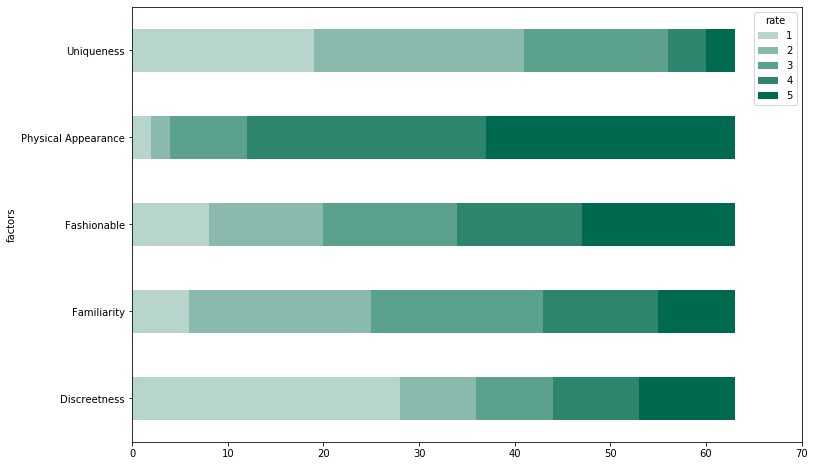

In [7]:
colors = ["#b8d5cd", "#8abaae", '#5ca08e', '#2e856e', '#006a4e']
cols = ['1', '2', '3', '4', '5']

p_df[cols] = p_df[cols].apply(np.int64)

ax = p_df.loc[:, cols].plot.barh(stacked=True, color=colors, 
                                 figsize=(12,8), xlim=(0, 70))

ax.grid(False)

#plot.xticks(rotatioin=90)
ax.get_figure().savefig('Regular.png')

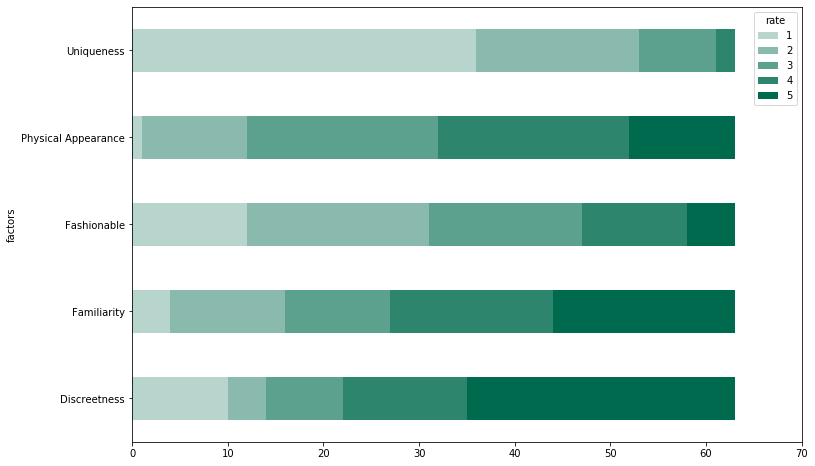

In [8]:
columns = ["factors", "1", "2", "3", "4", "5"]
df = pandas.DataFrame(np.array([["Discreetness", 10, 4, 8, 13, 28],
                                ["Uniqueness", 36, 17, 8, 2, 0],
                                ["Physical Appearance", 1, 11, 20, 20, 11],
                                ["Fashionable", 12, 19, 16, 11, 5],
                                ["Familiarity", 4, 12, 11, 17, 19]
                               ]), columns=columns)

df_melt = pandas.melt(df, id_vars=columns[0], var_name='rate', value_name='count')
p_df = df_melt.pivot(index='factors', columns='rate', values='count')

colors = ["#b8d5cd", "#8abaae", '#5ca08e', '#2e856e', '#006a4e']
cols = ['1', '2', '3', '4', '5']

p_df[cols] = p_df[cols].apply(np.int64)

ax = p_df.loc[:, cols].plot.barh(stacked=True, color=colors,
                                 figsize=(12,8), xlim=(0, 70))

ax.grid(False)

ax.get_figure().savefig('BCI.png')

In [ ]:
df = df_melt

fig, ax = plt.subplots(figsize=(10,7))  

rates = df['rate'].drop_duplicates()
margin_bottom = np.zeros(len(df['factors'].drop_duplicates()))
colors = ["#b8d5cd", "#8abaae", '#5ca08e', '#2e856e', '#006a4e']

for num, rate in enumerate(rates):
    counts = list(df[df['rate'] == rate].loc[:, 'count'])
    
    df[df['rate'] == rate].plot.bar(x='factors', y='count', ax=ax, 
                                    stacked=True, bottom=margin_bottom, color=colors[num], label=rate)
    
    margin_bottom += counts
    
plt.show()

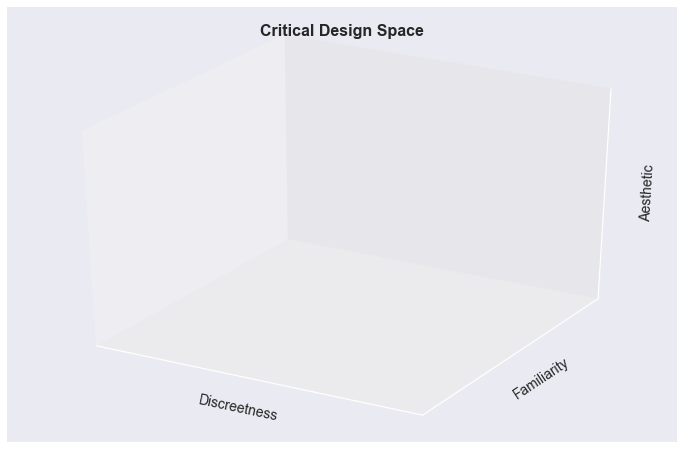

In [75]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.title('Critical Design Space', fontsize=16, fontweight="bold")
ax.set_xlabel('Discreetness', fontsize=14, rotation=150)
ax.set_ylabel('Familiarity', fontsize=14)
ax.set_zlabel('Aesthetic', fontsize=14, rotation=60);
plt.savefig('design_space.png');